# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split

# Data Collection 

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df=df.drop("Unnamed: 0",axis=1)

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
#getting the rows and columns
df.shape

(200, 4)

In [7]:
#getting the more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#checking the missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
#getting the statistical measures
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Understanding the Correlation

Positive Correlation

Negative Correlation

In [10]:
Correlation=df.corr()

<AxesSubplot:>

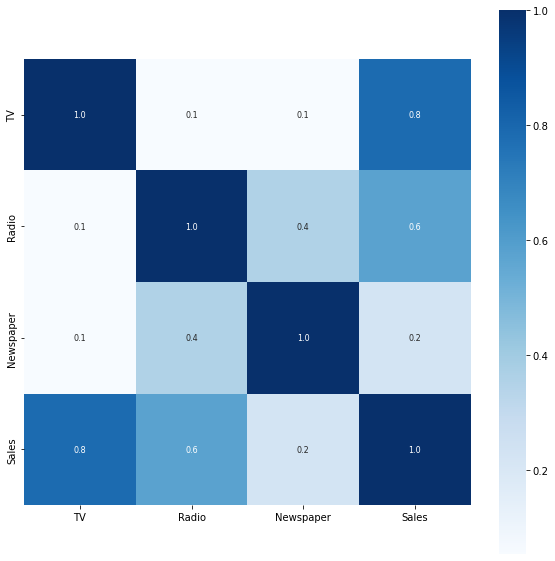

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(Correlation, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

# Splitting the data and the target

In [12]:
x=df.drop(columns='Sales',axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Training and testing data splitting 

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
print(x.shape,x_train.shape,x_test.shape)

(200, 3) (160, 3) (40, 3)


In [16]:
print(y.shape,y_train.shape,y_test.shape)

(200,) (160,) (40,)


# Model Training 

# XGBoost Regressor

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [18]:
from xgboost import XGBRegressor

In [19]:
model=XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Model Evaluation

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
training_data_prediction=model.predict(x_train)
print(training_data_prediction)

[20.800179  18.003693  21.80188   15.199386  19.799963  19.1991
 17.10171    1.6012093 10.900574   7.200486  12.901295  11.699508
 17.399979  17.300581   9.6970625 16.70156    9.500806   4.799462
  7.6000767 26.999365  18.900171  19.600292  11.500331  20.699104
 14.998632  11.300982  17.597061   7.199098   5.300146  10.399445
 10.497924   7.9974823 13.200741  10.995701  10.403221   6.5984683
  5.9004283 10.09639   14.399965  15.900462  25.400927  25.399939
 14.500571  12.600391  15.702936  22.09676   15.898893  10.101872
 25.400152  15.900793  18.003422   7.299305  15.297872  20.096088
 14.202006  21.400127  15.60131   24.399687  18.39939   12.200069
 14.598859   8.799738  20.699884   9.901035  22.200867  11.599976
 12.499365  23.698923  12.499918  16.60052    7.2981877 17.19972
 15.49767   12.800274  16.997866  10.799773  13.301284  11.398684
  9.701553  16.000004  11.199672  21.704327  11.300971  15.499515
 23.799566  10.597806  11.900724  11.6       24.200048  12.299164
 18.901188  

In [22]:
#R-Squared Error
Score=metrics.r2_score(y_train,training_data_prediction)

In [23]:
#Mean Absolute Error
score1=metrics.mean_absolute_error(y_train,training_data_prediction)

In [24]:
print("R-Squared Error:",Score)
print("Mean-Absolute-Error",score1)

R-Squared Error: 0.9999999162275747
Mean-Absolute-Error 0.0010797278583049824


# Visualize the actual prices on the predicted prices

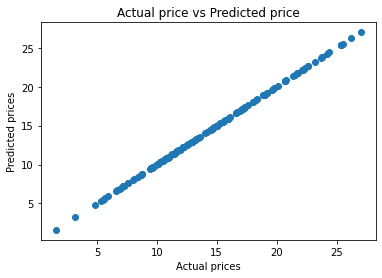

In [25]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual price vs Predicted price")
plt.show()

# Evaluating the test data

In [26]:
testing_data_prediction=model.predict(x_test)
print(testing_data_prediction)

[13.294892  10.868282   8.443363  13.313949  18.975937  15.724181
  8.9083    20.545956  12.443294  12.796904   8.106341  19.512918
 10.056588   6.1297784 11.723509   8.664295   7.4563336 17.244297
 16.403591  18.493464  15.952006  12.552912  10.770212  10.728684
 11.77246   12.17015   15.243687   9.597063  15.677     11.736189
 12.667023  16.936995  11.683007  13.39203    3.8584042 11.970738
 23.283123  20.4198    12.665993  21.3631   ]


In [27]:
#R-Squared Error
Score=metrics.r2_score(y_test,testing_data_prediction)
#Mean Absolute Error
score1=metrics.mean_absolute_error(y_test,testing_data_prediction)
print("R-Squared Error:",Score)
print("Mean-Absolute-Error",score1)

R-Squared Error: 0.9768625031449073
Mean-Absolute-Error 0.5236958885192873


# Data Visualization

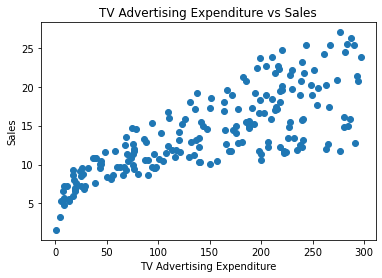

In [30]:
# Plotting the graph
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('TV Advertising Expenditure vs Sales')

# Display the plot
plt.show()

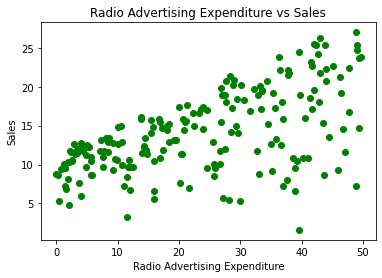

In [34]:
# Plotting the graph
plt.scatter(df['Radio'], df['Sales'],c='green')
plt.xlabel('Radio Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Radio Advertising Expenditure vs Sales')

# Display the plot
plt.show()

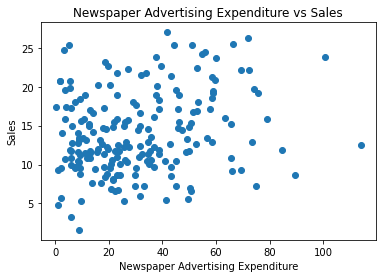

In [32]:
# Plotting the graph
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Newspaper Advertising Expenditure vs Sales')

# Display the plot
plt.show()

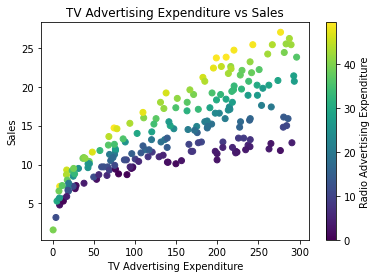

In [33]:
colors = df['Radio']

# Plotting the graph
plt.scatter(df['TV'], df['Sales'], c=colors, cmap='viridis')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('TV Advertising Expenditure vs Sales')

# Add a colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Radio Advertising Expenditure')

# Display the plot
plt.show()

# Building a Predictive a System

In [28]:
input_data=(230.1,37.8,69.2)

#change the input data to numpy array

input_data_as_numpy_array=np.array(input_data)

#reshape the numpy array as we are predicting for one instane

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

[22.09676]


In [29]:
0

0